In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

import ot

import os
import pickle as pkl
import copy

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from utils import *
from DataSetLoader import dataset_loader, ground_truth
from SinkhornImputation import SinkhornImputation
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from  nulls_injector import NullsInjector
from Inject_Missing_Values import *
from Miss import *

import argparse
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination


ModuleNotFoundError: No module named 'SoftImpute'

**Load the Dataset**

In [ ]:
Student_performance = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+ Fairness\Data\Student_performance_data _.csv")

In [ ]:
data = Student_performance.iloc[:, :-1]
label =  Student_performance.iloc[:, -1]

In [ ]:
label

0       2
1       1
2       4
3       3
4       4
       ..
2387    0
2388    4
2389    2
2390    1
2391    1
Name: GradeClass, Length: 2392, dtype: int64

In [ ]:
data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [ ]:
print(['Age'].unique())
print(german_credit_data['Sex'].unique())
print(german_credit_data['Job'].unique())
print(german_credit_data['Housing'].unique())
print(german_credit_data['Saving accounts'].unique())
print(german_credit_data['Checking account'].unique())
print(german_credit_data['Credit amount'].unique())
print(german_credit_data['Purpose'].unique())
print(german_credit_data['Risk'].unique())
#missing values denoted as -1


[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
[1 0]
[2 1 3 0]
[1 0 2]
[-1.  0.  2.  3.  1.]
[ 0.  1. -1.  2.]
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860 

Learning the structure of the Bayesian Network...


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

Bayesian Network Structure:
[]


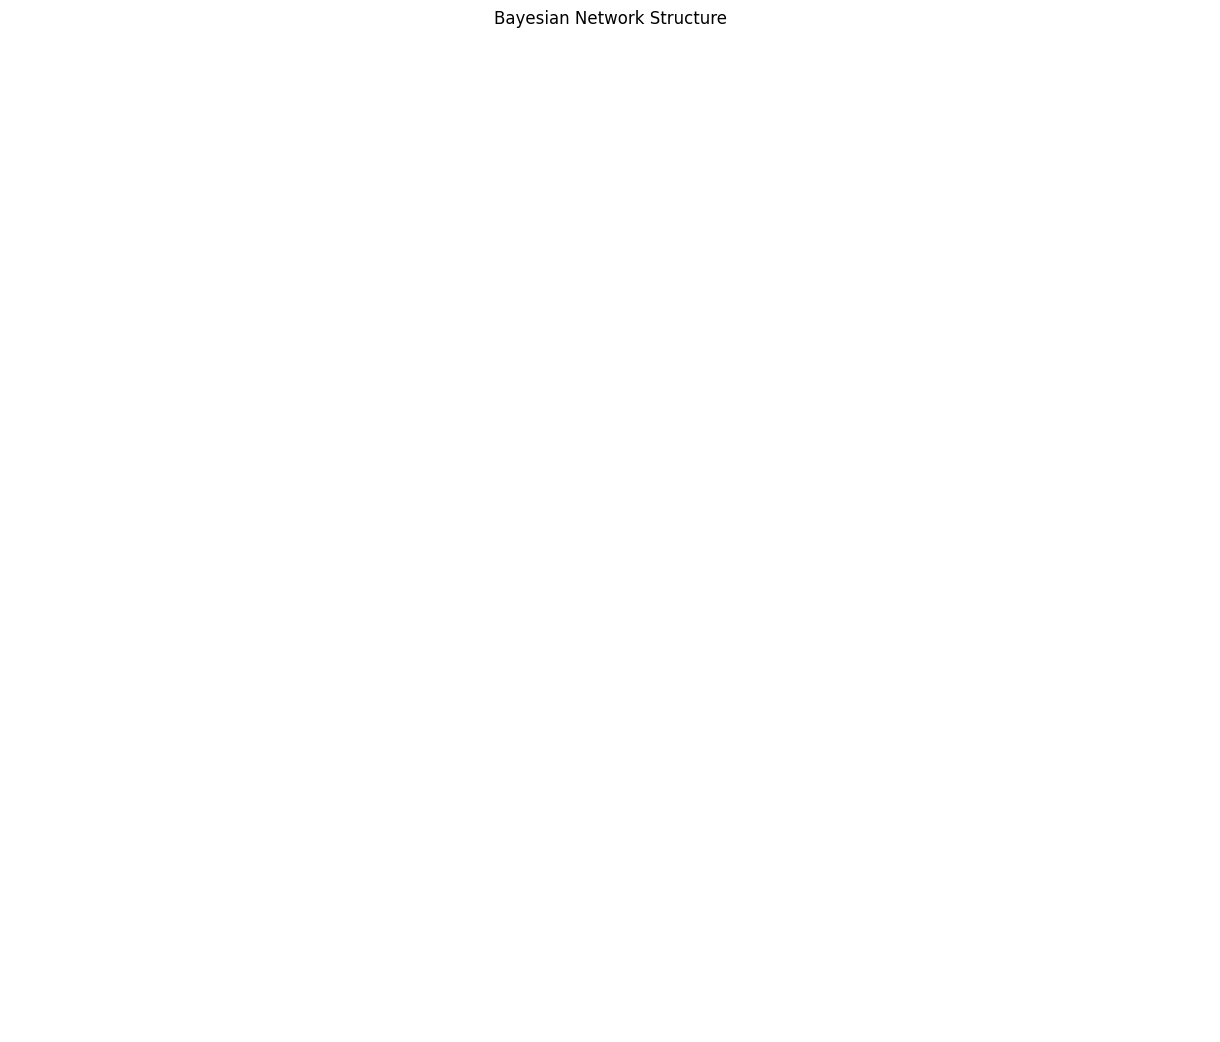

Fitting the Bayesian Network with data...


In [ ]:



# Step 2: Identify missingness indicators
# Add missingness indicators for each column with missing values
missing_indicators = {}
for column in data.columns:
    if data[column].isnull().any():
        missing_indicators[f'R_{column}'] = data[column].isnull().astype(int)

# Add missingness indicators to the dataset
for key, value in missing_indicators.items():
    data[key] = value

# Drop rows with missing values temporarily for structure learning
data_complete = data.dropna()

# Step 3: Learn the structure of the Bayesian Network
print("Learning the structure of the Bayesian Network...")
hc = HillClimbSearch(data_complete)
model = hc.estimate(scoring_method=BicScore(data_complete))

# Create the Bayesian Network from the learned structure
bayesian_net = BayesianNetwork(model.edges())

# Step 4: Visualize the Bayesian Network
def visualize_bayesian_network(bayesian_net):
    # Create a networkx graph from the Bayesian Network
    G = nx.DiGraph()
    G.add_edges_from(bayesian_net.edges())

    # Plot the graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)  # Define layout
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=3000,
        node_color="lightblue",
        font_size=10,
        font_weight="bold",
        arrowsize=20,
    )
    plt.title("Bayesian Network Structure")
    plt.show()

print("Bayesian Network Structure:")
print(bayesian_net.edges())
visualize_bayesian_network(bayesian_net)

# Step 5: Fit the Bayesian Network with the data
print("Fitting the Bayesian Network with data...")
bayesian_net.fit(data, estimator=MaximumLikelihoodEstimator)


In [ ]:
inference = VariableElimination(bayesian_net)

# Example Query 1: Probability of missingness for a variable
print("\nProbabilities of Missingness:")
for missing_var in missing_indicators.keys():
    query_result = inference.query(variables=[missing_var])
    print(f"{missing_var}:")
    print(query_result)

# Example Query 2: Joint probability of two variables
query_result = inference.query(variables=["Checking account", "Saving accounts"])
print("\nJoint Probability")
print(query_result)



Probabilities of Missingness:

Joint Probability
+------------------------+-----------------------+-----------------------------------------+
| Checking account       | Saving accounts       |   phi(Checking account,Saving accounts) |
+========================+=======================+=========================================+
| Checking account(-1.0) | Saving accounts(-1.0) |                                  0.0990 |
+------------------------+-----------------------+-----------------------------------------+
| Checking account(-1.0) | Saving accounts(0.0)  |                                  0.1910 |
+------------------------+-----------------------+-----------------------------------------+
| Checking account(-1.0) | Saving accounts(1.0)  |                                  0.0390 |
+------------------------+-----------------------+-----------------------------------------+
| Checking account(-1.0) | Saving accounts(2.0)  |                                  0.0400 |
+-------------------

In [ ]:
query_result = inference.query(variables=["Sex", "Housing"])
print("\nJoint Probability")
print(query_result)


Joint Probability
+--------+------------+--------------------+
| Sex    | Housing    |   phi(Sex,Housing) |
+========+============+====================+
| Sex(0) | Housing(0) |             0.0190 |
+--------+------------+--------------------+
| Sex(0) | Housing(1) |             0.1960 |
+--------+------------+--------------------+
| Sex(0) | Housing(2) |             0.0950 |
+--------+------------+--------------------+
| Sex(1) | Housing(0) |             0.0890 |
+--------+------------+--------------------+
| Sex(1) | Housing(1) |             0.5170 |
+--------+------------+--------------------+
| Sex(1) | Housing(2) |             0.0840 |
+--------+------------+--------------------+


In [ ]:
result = inference.query(variables=["Checking account"], evidence={"Saving accounts": True})
print("Conditional Probability P(Checking account | Saving accounts = True):")
print(result)

Conditional Probability P(Checking account | Saving accounts = True):
+------------------------+-------------------------+
| Checking account       |   phi(Checking account) |
+========================+=========================+
| Checking account(-1.0) |                  0.3786 |
+------------------------+-------------------------+
| Checking account(0.0)  |                  0.1165 |
+------------------------+-------------------------+
| Checking account(1.0)  |                  0.4563 |
+------------------------+-------------------------+
| Checking account(2.0)  |                  0.0485 |
+------------------------+-------------------------+


In [ ]:
result = inference.query(variables=["Sex"], evidence={"Housing": 2})
print("Conditional Probability P(Sex | Housing = 2):")
print(result)

Conditional Probability P(Sex | Housing = 2):
+--------+------------+
| Sex    |   phi(Sex) |
+========+============+
| Sex(0) |     0.5307 |
+--------+------------+
| Sex(1) |     0.4693 |
+--------+------------+


In [ ]:
type(result)

pgmpy.factors.discrete.DiscreteFactor.DiscreteFactor

In [ ]:
generator = Inject_Missing_Values()

In [ ]:
miss_mcar,index_mcar = generator.MCAR(data, missing_rate=15)
print(miss_mcar.isna().sum())


print(miss_mcar)
print(miss_mcar.notna().sum())
print(index_mcar) 

Age                 168
Sex                 143
Job                 144
Housing             143
Saving accounts     159
Checking account    178
Credit amount       130
Duration            152
Purpose             133
dtype: int64
      Age  Sex  Job  Housing  Saving accounts  Checking account  \
0    67.0  1.0  2.0      NaN             -1.0               0.0   
1    22.0  0.0  2.0      1.0              0.0               1.0   
2    49.0  1.0  1.0      1.0              0.0              -1.0   
3    45.0  1.0  2.0      NaN              0.0               0.0   
4    53.0  1.0  2.0      0.0              0.0               0.0   
..    ...  ...  ...      ...              ...               ...   
995   NaN  NaN  1.0      1.0              0.0              -1.0   
996  40.0  NaN  3.0      1.0              0.0               0.0   
997  38.0  1.0  2.0      1.0              NaN              -1.0   
998  23.0  1.0  2.0      0.0              0.0               0.0   
999  27.0  1.0  2.0      1.0      

In [ ]:
total_missing_percentage = miss_mcar.isnull().sum().sum() / miss_mcar.size * 100
print(f"Total Missing Percentage: {total_missing_percentage:.2f}%")

Total Missing Percentage: 15.00%


In [ ]:
dependencies = {
    "Checking account": {"influencers": ["Saving accounts"], "condition": lambda row: row["Saving accounts"] < 1},
    "Sex": {"influencers": ["Housing"], "condition": lambda row: row["Housing"] > data["Housing"].mean() }
    
}

In [ ]:
miss_mar,index_mar = generator.MAR(miss_mcar,dependencies,missing_rate=15)

In [ ]:
print(index_mar)

{'0,3': 'MCAR', '1,7': 'MCAR', '3,3': 'MCAR', '4,6': 'MCAR', '5,5': 'MCAR,MAR', '6,3': 'MCAR', '6,5': 'MCAR', '6,8': 'MCAR', '7,6': 'MCAR', '7,7': 'MCAR', '8,7': 'MCAR', '10,0': 'MCAR', '11,1': 'MCAR,MAR', '11,6': 'MCAR', '11,7': 'MCAR', '11,8': 'MCAR', '13,0': 'MCAR', '14,1': 'MCAR', '14,3': 'MCAR', '14,4': 'MCAR', '16,0': 'MCAR', '16,6': 'MCAR', '19,4': 'MCAR', '20,4': 'MCAR', '21,2': 'MCAR', '21,4': 'MCAR', '21,7': 'MCAR', '22,1': 'MCAR,MAR', '22,4': 'MCAR', '23,4': 'MCAR', '24,4': 'MCAR', '25,4': 'MCAR', '25,5': 'MCAR', '25,6': 'MCAR', '26,1': 'MCAR', '27,8': 'MCAR', '29,5': 'MCAR,MAR', '30,4': 'MCAR', '31,7': 'MCAR', '32,1': 'MCAR', '32,3': 'MCAR', '33,7': 'MCAR', '35,5': 'MCAR,MAR', '35,6': 'MCAR', '36,8': 'MCAR', '37,2': 'MCAR', '37,4': 'MCAR', '38,2': 'MCAR', '38,4': 'MCAR', '38,7': 'MCAR', '38,8': 'MCAR', '39,1': 'MCAR', '39,4': 'MCAR', '39,6': 'MCAR', '40,2': 'MCAR', '40,3': 'MCAR', '40,5': 'MCAR', '40,7': 'MCAR', '41,1': 'MCAR', '42,0': 'MCAR', '42,4': 'MCAR', '43,0': 'MCAR'

In [ ]:
total_missing_percentage = miss_mar.isnull().sum().sum() / miss_mar.size * 100
print(f"Total Missing Percentage: {total_missing_percentage:.2f}%")

Total Missing Percentage: 22.71%


In [ ]:
dependencies_mnar = {
    "Purpose": {
        "condition": lambda row: row["Purpose"] > 5  # High earners are more likely to not report salary
    },
    "Credit amount": {
        "condition": lambda row: row["Credit amount"] < 1200  # High BP patients may avoid reporting BP readings
    },
    "Saving accounts": {
        "condition": lambda row: row["Saving accounts"] < 2  # High BP patients may avoid reporting BP readings
    }
    
}

In [ ]:
miss_mnar,index_mnar = generator.MNAR(miss_mar,dependencies_mnar,missing_rate=15)

In [ ]:
print(index_mnar)

{'0,3': 'MCAR', '1,7': 'MCAR', '3,3': 'MCAR', '4,6': 'MCAR', '5,5': 'MCAR,MNAR,MAR', '6,3': 'MCAR', '6,5': 'MCAR', '6,8': 'MCAR', '7,6': 'MCAR', '7,7': 'MCAR', '8,7': 'MCAR', '10,0': 'MCAR', '11,1': 'MCAR,MAR', '11,6': 'MCAR', '11,7': 'MCAR', '11,8': 'MCAR', '13,0': 'MCAR', '14,1': 'MCAR', '14,3': 'MCAR', '14,4': 'MCAR', '16,0': 'MCAR', '16,6': 'MCAR', '19,4': 'MCAR', '20,4': 'MCAR', '21,2': 'MCAR', '21,4': 'MCAR', '21,7': 'MCAR', '22,1': 'MCAR,MAR', '22,4': 'MCAR', '23,4': 'MCAR', '24,4': 'MCAR', '25,4': 'MCAR', '25,5': 'MCAR', '25,6': 'MCAR', '26,1': 'MCAR', '27,8': 'MCAR', '29,5': 'MCAR,MNAR,MAR', '30,4': 'MCAR', '31,7': 'MCAR', '32,1': 'MCAR', '32,3': 'MCAR', '33,7': 'MCAR', '35,5': 'MCAR,MNAR,MAR', '35,6': 'MCAR', '36,8': 'MCAR', '37,2': 'MCAR', '37,4': 'MCAR', '38,2': 'MCAR', '38,4': 'MCAR', '38,7': 'MCAR', '38,8': 'MCAR', '39,1': 'MCAR', '39,4': 'MCAR', '39,6': 'MCAR', '40,2': 'MCAR', '40,3': 'MCAR', '40,5': 'MCAR', '40,7': 'MCAR', '41,1': 'MCAR', '42,0': 'MCAR', '42,4': 'MCAR',

In [ ]:
total_missing_percentage = miss_mnar.isnull().sum().sum() / miss_mnar.size * 100
print(f"Total Missing Percentage: {total_missing_percentage:.2f}%")

Total Missing Percentage: 33.01%


In [ ]:
missing_45 = pd.concat([miss_mnar, label], axis=1)

In [ ]:
missing_45

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67.0,1.0,2.0,NaN,NaN,NaN,NaN,6.0,5.0,1
1,22.0,0.0,2.0,1.0,NaN,NaN,5951.0,NaN,5.0,0
2,49.0,1.0,1.0,1.0,NaN,NaN,2096.0,12.0,3.0,1
3,45.0,1.0,2.0,NaN,NaN,NaN,7882.0,42.0,4.0,1
4,53.0,1.0,2.0,0.0,NaN,NaN,NaN,24.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,1.0,1.0,NaN,NaN,1736.0,12.0,NaN,1
996,40.0,NaN,3.0,1.0,NaN,NaN,3857.0,30.0,1.0,1
997,38.0,1.0,2.0,1.0,NaN,-1.0,NaN,12.0,5.0,1
998,23.0,1.0,2.0,0.0,NaN,NaN,1845.0,45.0,5.0,0


In [ ]:
missing_45.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+ Fairness\Data\Missing_Injected_Data\german_missing_45_multiple.csv", index=False)